### Predict customer churn using historical customer data by developing a machine learning model that takes into account various attributes such as age, subscription length, usage, and location, ultimately enabling proactive retention strategies and improving customer satisfaction

##### Data Preprocessing:

In [1]:
# Importing some important libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and put it in variable "Data"
Data=pd.read_excel("customer_churn_large_dataset.xlsx")
Data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
# Know the info of variable in data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [4]:
# Know the data types of the variable
Data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [5]:
# To the statistics info of the data
Data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
# To know the statistics info of the categorical variable in the data
Data.describe(include="object")

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [7]:
# To know the sum of null values in the data
Data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
# To know the duplicate value in the data
Data.duplicated().sum()

0

In [9]:
# To get valce_count of categorical variable
for i in Data.columns:
    if Data[i].dtype == "object":
        print(Data[i].value_counts())
        print()

Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64

Female    50216
Male      49784
Name: Gender, dtype: int64

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64



##### Feature Engineering:

In [10]:
# Now convert categorical data into numarical data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in Data.columns:
    if Data[i].dtype=="object":
        Data[i]=lab.fit_transform(Data[i])
Data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,2,17,73.36,236,0
1,2,11112,62,0,4,1,48.76,172,0
2,3,22223,24,0,2,5,85.47,460,0
3,4,33334,36,0,3,3,97.94,297,1
4,5,44445,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,99996,33,1,1,23,55.13,226,1
99996,99997,99997,62,0,4,19,61.65,351,0
99997,99998,99998,64,1,0,17,96.11,251,1
99998,99999,99999,51,0,4,20,49.25,434,1


In [11]:
# Check the multicolinearity by using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = Data.drop(['Churn'],axis=1)
vif=pd.DataFrame({'variables':df.columns})
vif['vif']=[variance_inflation_factor(df.values,i)
           for i in range(len(df.columns))]
vif

,variables,vif
0,CustomerID,11.997193
1,Name,11.999057
2,Age,7.007656
3,Gender,1.933407
4,Location,2.818273
5,Subscription_Length_Months,3.839255
6,Monthly_Bill,7.866456
7,Total_Usage_GB,4.714235


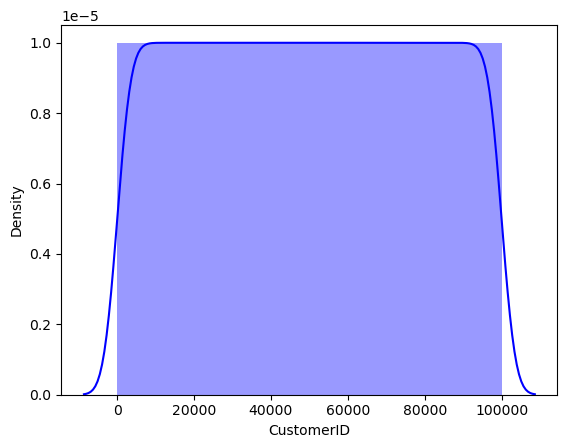

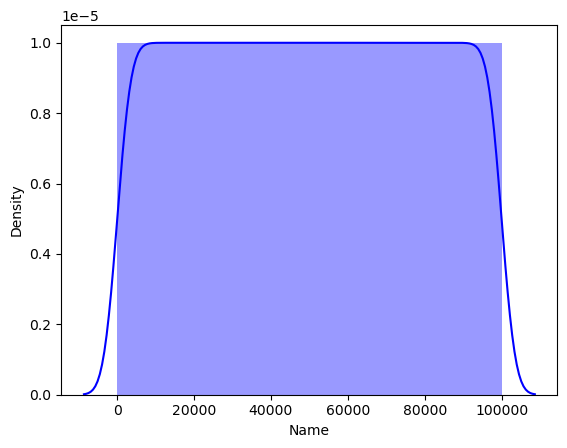

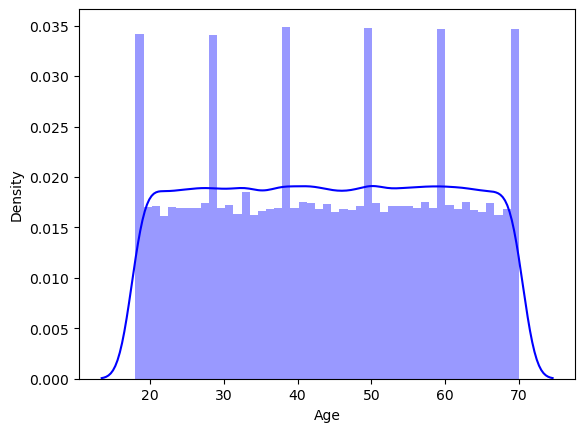

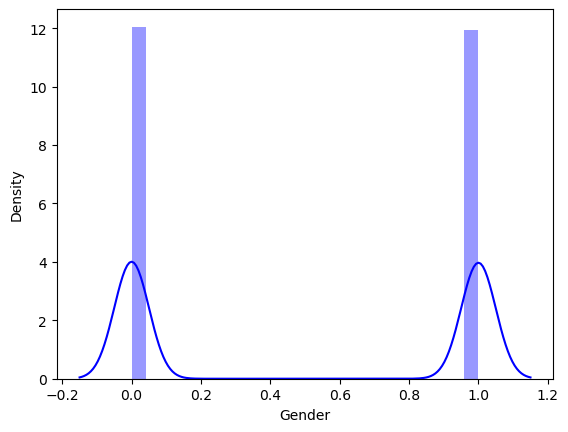

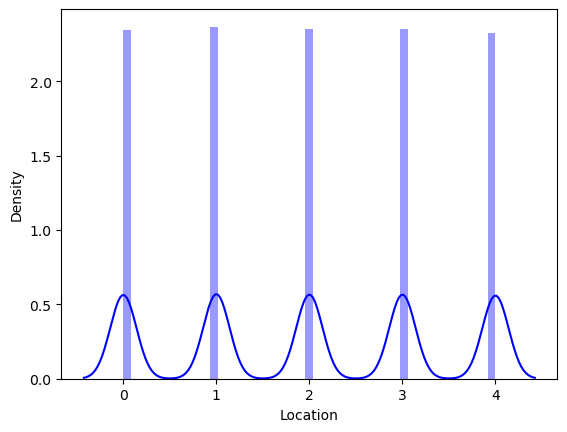

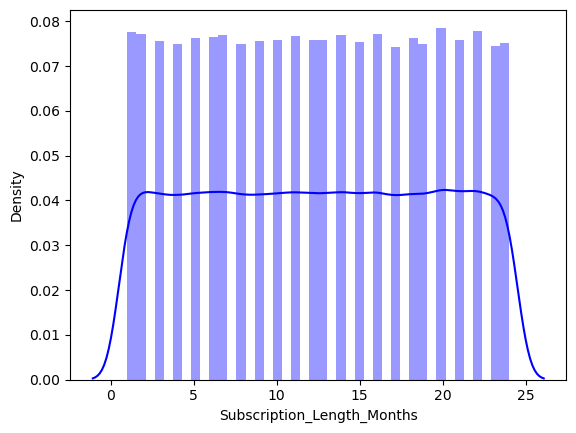

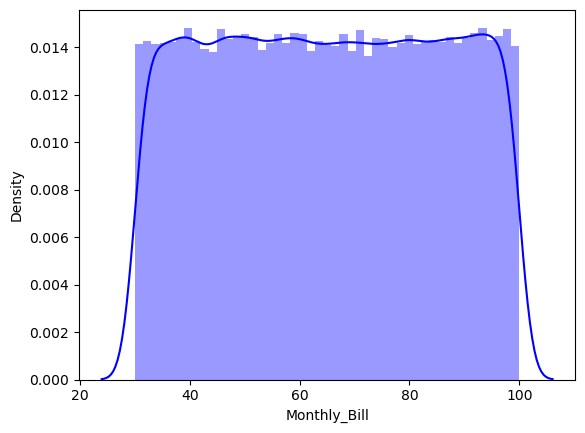

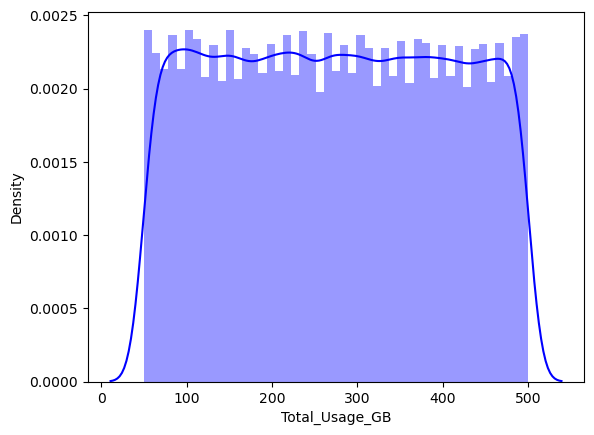

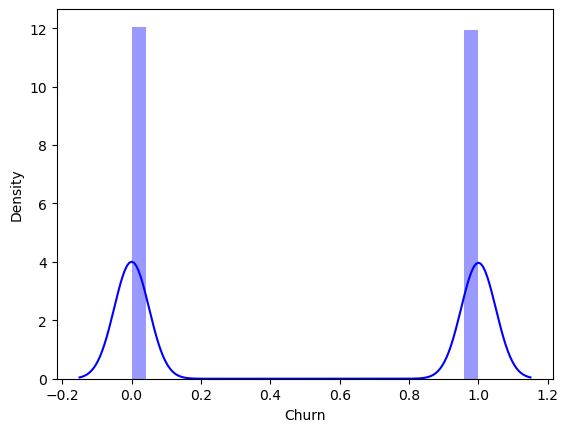

In [12]:
# See the skewness in the data
for i in Data.columns:
    sns.distplot(Data[i],color="blue")
    plt.show()

In [13]:
Data.corr()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,0.818259,-0.001085,-0.000131,0.000062,0.005444,0.001265,-0.004025,-0.004586
Name,0.818259,1.000000,-0.000948,0.003875,-0.004283,0.007357,0.000353,-0.002791,-0.001418
Age,-0.001085,-0.000948,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,-0.000131,0.003875,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,0.000062,-0.004283,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.005444,0.007357,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.000353,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,-0.002791,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,-0.001418,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


<AxesSubplot:>

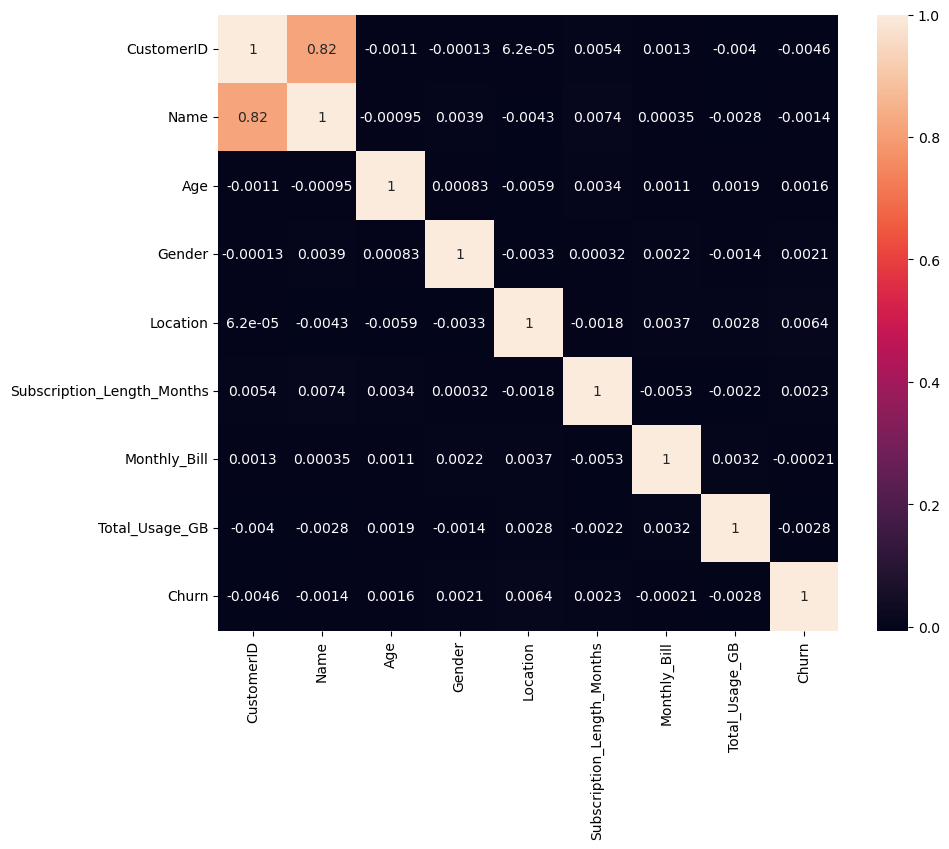

In [14]:
# Now plot the heatmap to the correlation of the data
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)# annot show the value of correlation 

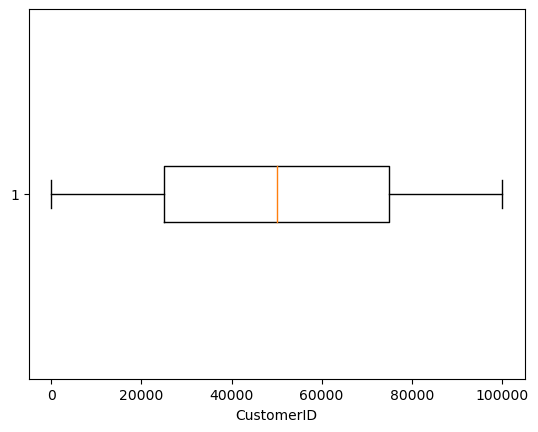

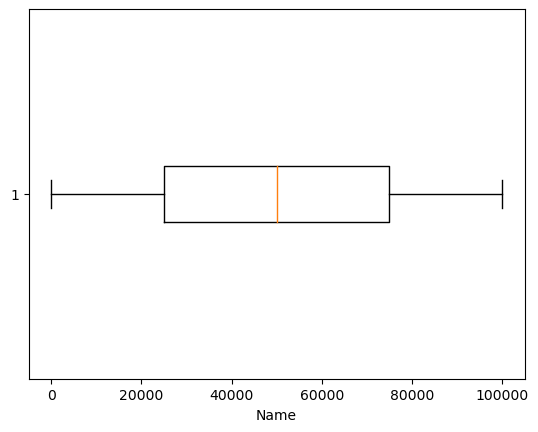

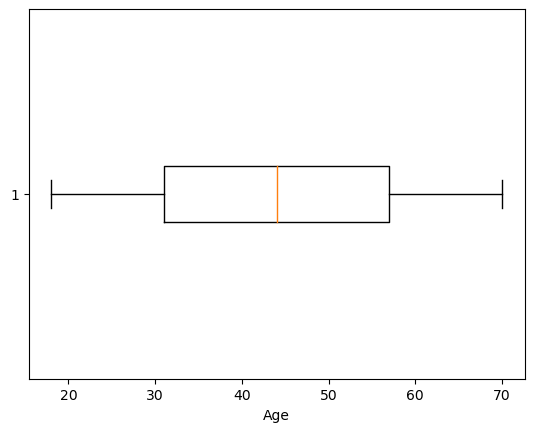

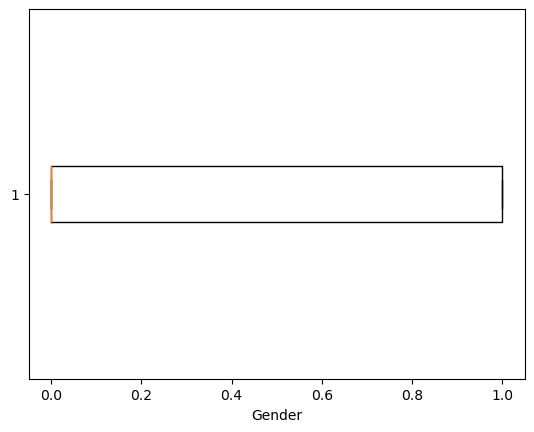

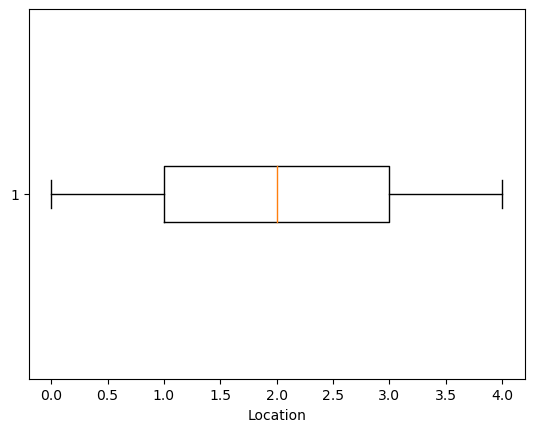

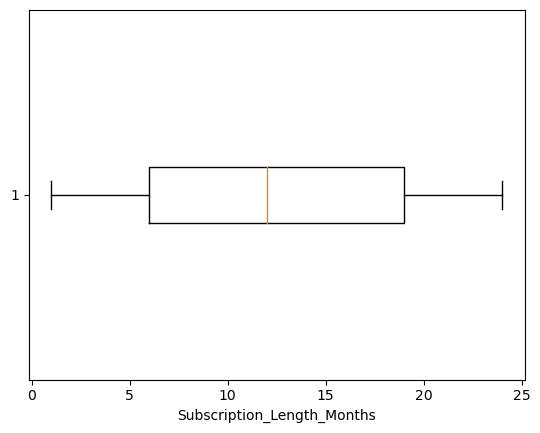

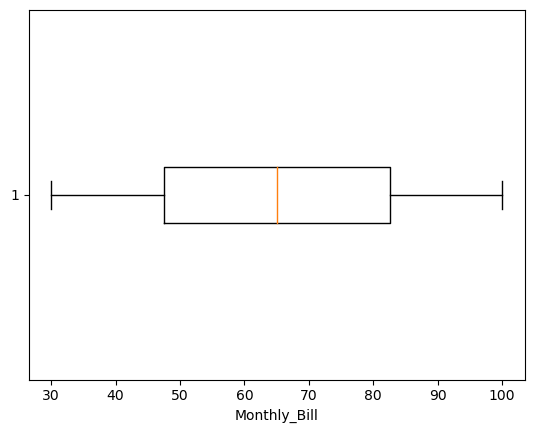

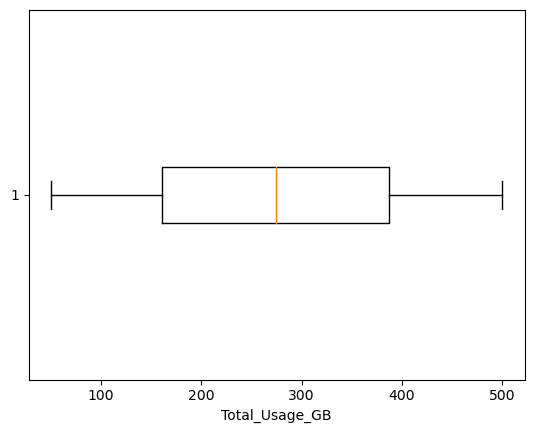

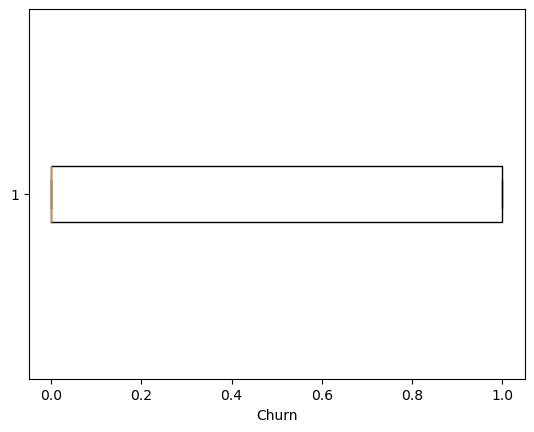

In [15]:
# Now plot the boxplot to see the outliers
for i in Data.columns:
    plt.boxplot(Data[i], vert=False)  # vert=False to show the boxplot horizontally
    plt.xlabel(i)
    plt.show()

##### Model Building:

In [16]:
# Drop the divide the data in x & y, all columns in x except "charges", y take "charges" column
x=Data.drop(["Churn",'CustomerID'],axis=1)
y=Data["Churn"]
print(x)

        Name  Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0          0   63       1         2                          17         73.36   
1      11112   62       0         4                           1         48.76   
2      22223   24       0         2                           5         85.47   
3      33334   36       0         3                           3         97.94   
4      44445   46       0         3                          19         58.14   
...      ...  ...     ...       ...                         ...           ...   
99995  99996   33       1         1                          23         55.13   
99996  99997   62       0         4                          19         61.65   
99997  99998   64       1         0                          17         96.11   
99998  99999   51       0         4                          20         49.25   
99999      5   27       0         2                          19         76.57   

       Total_Usage_GB  
0  

In [17]:
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


In [18]:
# Use standard scaler for scale all variable in between -3 to 3
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X=sta.fit_transform(x)
print(x)

        Name  Age  Gender  Location  Subscription_Length_Months  Monthly_Bill  \
0          0   63       1         2                          17         73.36   
1      11112   62       0         4                           1         48.76   
2      22223   24       0         2                           5         85.47   
3      33334   36       0         3                           3         97.94   
4      44445   46       0         3                          19         58.14   
...      ...  ...     ...       ...                         ...           ...   
99995  99996   33       1         1                          23         55.13   
99996  99997   62       0         4                          19         61.65   
99997  99998   64       1         0                          17         96.11   
99998  99999   51       0         4                          20         49.25   
99999      5   27       0         2                          19         76.57   

       Total_Usage_GB  
0  

##### Train_Test_split:

In [19]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.80,random_state=12)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 7), (20000, 7), (80000,), (20000,))

##### LogisticRegression

In [20]:
# let see the coefficient and Intercept
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
# Predicting "y_pred" that is "charges" column
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
lr.score(x_train,y_train)

0.504325

In [23]:
lr.score(x_test,y_test)

0.5043

In [24]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.5043
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58     10068
           1       0.50      0.33      0.40      9932

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



##### RandomForest:

In [25]:
from sklearn.ensemble import RandomForestClassifier
Ran = RandomForestClassifier()
Ran.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
Ran.score(x_train, y_train)

1.0

In [27]:
Ran.score(x_test,y_test)# it shows overfitting so remove this we have to optimise the model performance

0.4944

##### Model Optimization:

In [28]:
from sklearn.ensemble import RandomForestClassifier
Ran = RandomForestClassifier(n_estimators=25,criterion='gini', max_depth=2,min_samples_split=2,min_samples_leaf=1,ccp_alpha=0.250159813101414)
Ran.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.250159813101414, max_depth=2,
                       n_estimators=25)

In [29]:
Ran.score(x_train, y_train)

0.5019125

In [30]:
Ran.score(x_test,y_test)

0.5034

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
model = RandomForestClassifier(random_state=12)

# Perform k-fold cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

# Print average accuracy across all folds
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.49610000000000004


In [32]:
# This data has variable with less co-relation so the accuracy not increasing after every perimeter

In [33]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict_churn():
    data = request.json  # Get new customer data from request
    # Preprocess the data, scale features, and use the trained model to predict
    prediction = best_model.predict(scaler.transform([data]))
    response = {'prediction': int(prediction[0])}
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)
